*this notebook is based on PHYS 105A material by Dr. Elisabeth Krause, Dr. Gurtina Besla and Dr. Phil Pinto*

## Contents

1. Review of reading input from files 
2. Plotting data as points with errorbars
3. Supernova cosmology


Before we get started, let's execute the following cell which is almost always needed for our notebooks:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

and this will make the plots appear larger

In [4]:
plt.rcParams["figure.dpi"] = 120

In this exercise we will use data from the Supernova Cosmology project, one of the two teams which first found that the expansion rate of the Universe is accelerating in 1999. A simple introduction to the methods and findings of the SCP group can be found at https://newscenter.lbl.gov/2009/10/27/evolving-dark-energy/. The original paper is Perlmutter *et al.* 1999, "Measurement of $\Omega$ and $\Lambda$ from 42 High Redshift Supernovae", The Astrophysical Journal, Vol. 517, page 565.

The data set we will be using is a more recent sample, containing observations of 580 supernovae, known as the Union 2.1 sample from the paper Suzuki *et al*. 2012, "THE *HUBBLE SPACE TELESCOPE* CLUSTER SUPERNOVA SURVEY. V. IMPROVING THE DARK-ENERGY CONSTRAINTS ABOVE $z>1$ AND BUILDING AN EARLY-TYPE-HOSTED SUPERNOVA SAMPLE", The Astrophysical Journal, vol. 746, page 85.

The data are in the file SCPUnion2.1_mu_vs_z.txt, which you may have downloaded in the last lab. If not, download it now into your working directory.
cell of this notebook.*

We will read in the file using the `with` statement. Recall that one should always close files when finished using them.
The `with` statement makes this automatic; using it is a good habit to form.

Lets simply open the file and print out the first 10 lines to recall how to read from a file:

In [6]:
with open('SCPUnion2.1_mu_vs_z.txt', 'r') as infile:
    for i in range(10):
        line = infile.readline()
        line = line.rstrip("\n")
        print(line)

# Supernova Cosmology Project Union2.1 Data
#
#                      Distance      Distance        Probability of Low-
# Name Redshift        Modulus       Modulus Error   Mass Host Galaxy
1993ah 0.028488        35.3465833928 0.223905932998  0.128418942246
1993ag 0.050043        36.6823679154 0.166828851413  0.128418942246
1993o  0.052926        36.8176912545 0.1557559148    0.128418942246
1993b  0.070086        37.4467365424 0.158466934433  0.128418942246
1992bs 0.062668        37.4834093505 0.156099434739  0.128418942246
1992br 0.087589        38.2290570494 0.187745679272  0.128418942246


The top of any good data file intended for sharing with others contains a "header" -- some lines at the top which describe the contents of the file.

Here we see that the file contains the SCP Union2.1 data, and that the columns are:

 * the name of the supernova
 * the redshift measured from its spectrum
 * its distance modulus
 * an estimate of the measurement error in the distance modulus
 * the probability it occurred in a low-mass host galaxy
 
For this exercise, we won't care what a supernova's name is, and we won't get to the last column until the end of the exercise.

Before we start analyzing this data, you need to know some astronomical background. Ultimately, we'll be making a plot of velocity versus distance, but we need to know how astronomers measure these quantities.

The supernovae listed in the data file are all of a particular type called Type Ia Supernovae, thought to be the thermonuclear incineration of a carbon/oxygen white dwarf star. The explosions last about a month and are so luminous that they can be seen halfway across the observable Universe; they release something like $10^{44}$ J of energy, and at peak brightness their luminosity is about $1.5\times10^{38}$ watts. Much of the iron in the Universe is made in Type Ia supernova explosions.

Type Ia supernovae are surprisingly uniform in their peak luminosity -- they aren't all pecisely the same, but by various means one can determine their peak luminosity within fairly small errors. Objects which are all of the same luminosity are known as *standard candles*. Because the flux (energy per time per area), what we perceive as brightness, falls off as the square of the distance to a source,

$$ F(d) = \frac{L}{4\pi d^2}$$

if we know a source's luminosity $L$, we can ask: how far away must the object be for it to appear as bright as we see? This measurement of distance is known as a *luminosity distance*. Of course, this depends upon knowning the true luminosity in the first place, hence the use of standard candles.

Next we need to understand how astronomers measure brightness. This goes all the way back to Hipparchus, born *circa* 190
BC in Nicaea in what is now Turkey. Hipparchus first classified stars by their apparent brightness. Of course, he had little idea of what a star was, but he nonetheless placed all of the stars visible to him into six brightness categories call *magnitudes*. Naturally, he put the brightest stars in the first magnitude, so that the dimmest stars (to him) were in magnitude 6. Because the human perception of brightness is proportional to the logarithm of the intensity of light arriving at the eye, Hipparchos' scale is a logarithmic one. The modern definition is that five magnitudes span
a factor of one hundred in brightness, so that the ratio in brightness of two sources one magnitude apart is $\sqrt[\leftroot{5}\uproot{2}5]{100}$. Thus, the magnitude of a source with a flux measured as $F$ is

$$ m = -2.5 \log_{10} \left(\frac{F}{F_0}\right)$$

where $F_0$ is some standard flux which defines the zero-point (the calibration) of the magnitude scale. Roughly speaking, the star Vega in the constellation Lyra has magnitude zero. This definition of magnitude, written with a lowercase $m$, is called the *apparent magnitude* -- it is a measure of how bright an object *appears*, and not of how luminous an object actually is.

We define the *absolute magnitude* $M$ (with an uppercase $M$) as the magnitude a source would have *if it were at a distance of 10 parsecs*

$$ M = -2.5 \log_{10} \left( \frac{1}{F_0} \frac{L}{4\pi (10\ \textrm{pc})^2} \right) $$

Thus, $M$ is a measure not of the flux $F$ we perceive at Earth but of the intrinsic luminosity $L$ of the source itself.

We can then form the difference between the absolute magnitude $M$ and the apparent magnitude $m$, a number called the *distance modulus* which depends only upon the distance to the source

$$
\begin{split}
m-M &= - 2.5 \log_{10} \left(\frac{1}{F_0}\frac{L}{4\pi d^2}\right) + 2.5 \log_{10}\left(\frac{1}{F_0}\frac{L}{4\pi(10\ \textrm{pc})^2}\right)  \\
&= 5 \log_{10}\left(\frac{d}{10\ \textrm{pc}}\right)
\end{split}
$$
Because $M$ and $m$ are logarithmic functions, their difference is proportional to the *ratio* of the distance $d$ to 10 pc.

This is the distance measurement given in the data file for the distance to the supernovae. The measured distance is then

$$\begin{equation} d = 10^{(m-M)/5 +1} \textrm{pc}
\label{eq:dm}
\tag{1}
\end{equation}
$$

Astronomers most frequently measure the velocity of objects in the direction toward or away from Earth by measuring the Doppler shift of features in their spectra, with positive velocities defined as moving away from Earth. Because the Universe is expanding, objects beyond the immediate vicinity of Earth, say, beyond a few million parsecs (Mpc), are all moving away from us. Thus all distant objects show a shift toward the red (low-energy) end of the spectrum -- a *redshift*. This shift is measured as a fraction of the speed of light.

You will note that some of the supernova in this datafile exhibit a redshift greater than one? How can this be?

Now that we know what the data describe, let's do some exploring. First, we need to read in the data and convert it to a form we can plot.

We'll want three arrays: the redshift, the distance modulus, and the distance modulus error. Because it is easier to append to a list than an array, we'll read the data in, convert to `float`'s, and then append to these lists.

We'll make a simple plot at the end, just to be sure we've read things in correctly. For that, we will use the `pyplot` function `errorbar` which allows us to plot the distance modulus error through the `yerr=` keyword.

Text(0, 0.5, 'm-M')

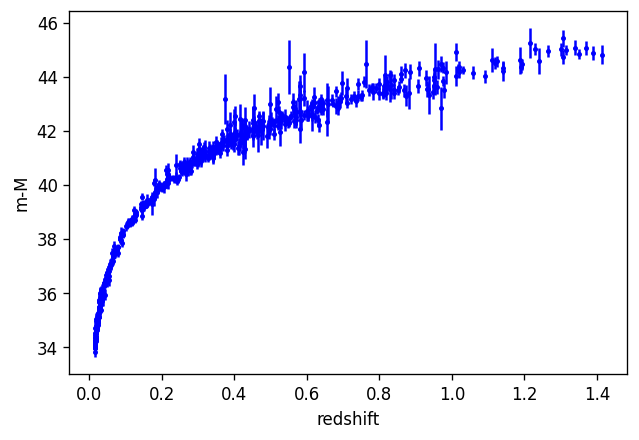

In [7]:
z = []    # redshift list
dm = []   # distance modulus
dme = []  # error in dm

with open('SCPUnion2.1_mu_vs_z.txt','r') as infile:
    for line in infile:
        if line[0]!='#':
            name, z0, dm0, dme0, foo = line.split()
            
            z.append( float(z0) )
            dm.append( float(dm0) )
            dme.append( float(dme0) )

plt.errorbar(z,dm,yerr=dme,fmt='bo',markersize=2)
plt.xlabel('redshift')
plt.ylabel('m-M')


Let's convert the lists into arrays so that we can use them in mathematical expressions more easily using `numpy`

In [8]:
z = np.array(z)
dm = np.array(dm)
dme = np.array(dme)

Now let's form an actual distance in mega-parsecs (Mpc) from the distance modulus using Eq. (1), and a velocity in km/second from the redshifts

In [9]:
parsec = 3.086e13               # km/parsec
Mpc = 1e6 * parsec              # km/Mpc
clight = 2.99792458e5           # km/second

r = 10**(dm/5+1) / 1e6          # Mpc, using Eq.(1)
v = z * clight                  # km/sec

To convert the distance modulus error into an error on distance, we use error propagation. Recall that the error $\sigma_f$ on a function $f(x)$ in terms the error $\sigma_x$ of the variable $x$ is given by

$$\begin{equation}
\sigma_f = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2\sigma_x^2}\,.
\end{equation}
$$

Hence, the distance error $\sigma_r$ in terms of the distance modulus error $\sigma_{m-M}$ is given by
$$\begin{equation}
\sigma_r = \sqrt{
\left( \frac{r \ln(10)}{5}\right)^2
\sigma_{m-M}^2}
\end{equation}
$$

In [10]:
sigma_r = r*np.log(10)/5*dme

and plot distance versus velocity just for the "nearby" supernovae, those within 200 Mpc of Earth. We can select the set of indices of the nearby supernovae using the `numpy.where` function

Text(0.5, 1.0, '135 nearest supernovae within 200 Mpc')

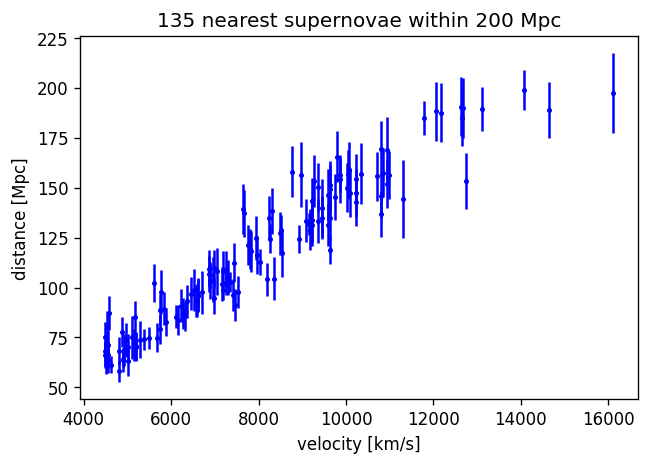

In [11]:
near = np.where(r < 200)

nNear = near[0].shape[0]            # get the number of nearby supernovae

plt.errorbar(v[near],r[near],yerr=sigma_r[near],fmt='bo',markersize=2)

plt.xlabel('velocity [km/s]')
plt.ylabel('distance [Mpc]')
plt.title(f"{nNear} nearest supernovae within 200 Mpc")

This looks more or less like a linear relationship. Such a plot was first made by Edwin Hubble in 1921, using distance measurements to galaxies made by assuming he knew the luminoisty of the brightest stars -- he was using the brightest star in a galaxy as a standard candle.

In an explosion, everything starts off at $r=0$ when $t=0$. At some later time $t$, the faster-moving material will have travelled farther than the slower-moving material. If there is nothing else going on like drag or gravitational forces, then distance will be proportional to velocity: $r=vt$.  The slope of the line in our plot is then $1/(\textrm{time since explosion)}$ -- in our case, the age of the Universe!

Hubble noticed this in his data, and postulated that the Universe is expanding as if in an explosion. He was, of course, right, and this was the first evidence for what we now call the Big Bang. The plot of cosmological distance as a function of recession velocity is now known as the *Hubble Diagram*. In fact, Hubble's distance measurements were way off (the brightest stars are not very good standard candles) and the age of the Universe he measured was about 10 times less than the one measured today.

Since we plot the data as velocity versus distance, the slope of the line is the inverse of the time since explosion. This inverse time is known as the *Hubble Constant*: $H_0$. Usually, astronomers plot the Hubble diagram with distance in Mpc and velocity in km/sec, so the Hubble constant has units of km/sec/Mpc, but this is just 1/time in funny units.

The most accurate measurements of the Hubble constant today give a value for the age of the Universe of
$13.772\pm0.06$ billion years. Just doing the units conversion, this corresponds to a Hubble constant of

In [12]:
secperYear = (60)*(60)*(24)*365.25

t = 13.772e9 * secperYear

H0 = (1/t)*Mpc

print(f"H0 = {H0:3.1f} km/sec/Mpc")

H0 = 71.0 km/sec/Mpc


(This is not quite correct as we will see below, but it turns out to be not far off.)

The simplest model for the expansion of the Universe is a Big Bang which is everywhere the same (homogeneous) and the same in all directions (isotropic), and which expands at the same rate for all time.
Thus, from our perspective, the Milky Way galaxy is the center of the explosion
and the redshift of a distant galaxy hosting one of our supernovae is linearly proportional to its distance.

If we plot this model atop the data, we see

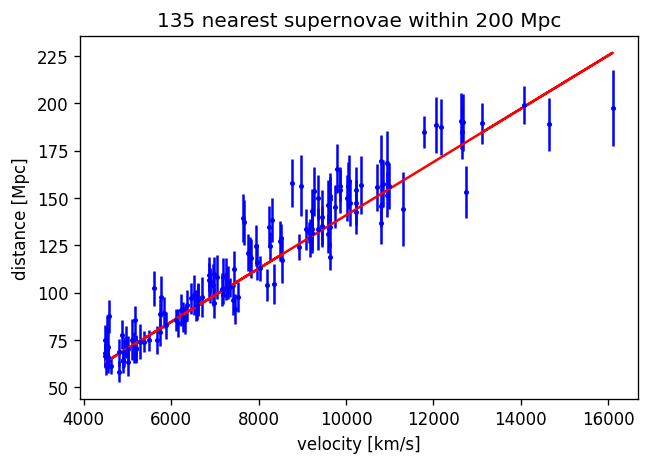

In [13]:
near = np.where(r<200)
nNear = near[0].shape[0]


plt.errorbar(v[near],r[near],yerr=sigma_r[near],fmt='bo',markersize=2)
plt.xlabel('velocity [km/s]')
plt.ylabel('distance [Mpc]')
plt.title(f"{nNear} nearest supernovae within 200 Mpc")

modelr = t * v[near] / Mpc

plt.plot(v[near], modelr,'r')


Not a bad fit to our model of an explosion! Perhaps there is something to this Big Bang idea after all...

Let's now try plotting the whole dataset, which extends to distances far beyond what Hubble could have measured in his day

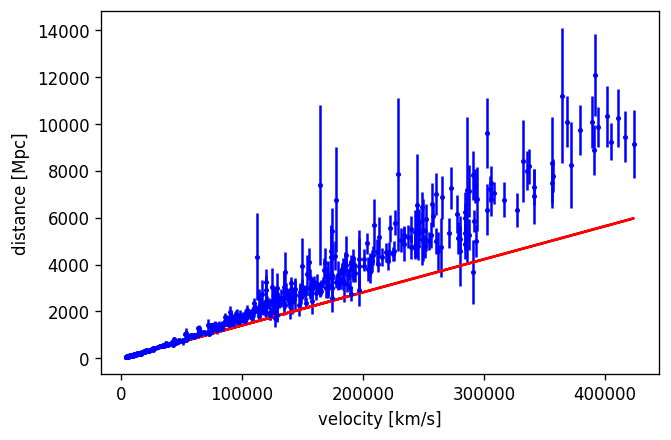

In [14]:
plt.errorbar(v,r,yerr=sigma_r,fmt='bo',markersize=2)
plt.xlabel('velocity [km/s]')
plt.ylabel('distance [Mpc]')

modelr = t * v / Mpc

plt.plot(v, modelr,'r')


The distant supernovae are moving more slowly than our simple model of an explosion would predict...

There are obviously some problems with our model!

First,  when we look at such a large volume of the Universe, we should really be using Einsten's General Theory of Relativity (GR). One of the differences between Newtonian gravity and GR is that, while the Newtonian theory has one constant in it -- "big $G$" -- GR has *two* constants: $G$ and and $\Lambda$. The second constant, $\Lambda$, is known as the *cosmological constant*.

You probably have heard the story (due to George Gamov) about how Einstein called $\Lambda$ his "biggest blunder", but $\Lambda$ is not just a "fudge factor" which Einstein put in his theory for dubious reasons -- it is an integral part of GR and should not be left out.

One way of viewing the effect of the GR term proportional to $\Lambda$ is that it represents the mass-energy associated with empty space. Since empty space doesn't emit light, this has come to be known as *Dark Energy*. The notion of empty space, a vacuum, having some energy associated with it is not as crazy as it sounds -- it is a part of the "standard model" of particle physics. The only problem is that the standard model predicts it to be about 120 orders of magnitude smaller than what was measured from our data!

The simplest cosmology in GR, then, is determined by the amount of matter in the universe and the amount of dark energy. There is a mutual, attractive gravitational force among all matter in the Universe. This "pull" acts against the expansion, causing the rate of expansion to decrease over time. As the Universe expands, the distance between all this matter increases, and the magnitude of this effect decreases over time.

The net effect of dark energy is to cause space to expand. Because the amount of dark energy is proportional to the amount of space, as the Universe expands, the amount of dark energy increases, as does its effect causing the expansion to accelerate.

Cosmologists specify the amounts of matter and dark energy in terms of the total amount of mass-energy in the Universe such that spacetime is, at the largest scale, flat, Euclidean space. Since the volume of the Universe is increasing as it expands, the density of these various sorts of mass-energy are also changing with time. The density of mass-energy today which would give a flat spacetime is known as the *critical density*. 

This seems like a pretty complicated model for us to use. Luckily, the `astropy` package has a set of functions to calculate cosmological quantities using GR.


`astropy` specifies the amount of matter and dark energy using the standard definition:

$$\begin{split}
\Omega_M &= \frac{\textrm{density of matter today}}{\textrm{critical density today}}\\[10pt]
\Omega_{de} &= \frac{\textrm{density of dark energy today}}{\textrm{critical density today}}
\end{split}
$$


First, we import the `LambdaCDM` object from `astropy.cosmology` (CDM is "cold dark matter")

In [15]:
from astropy.cosmology import LambdaCDM

If you received an error message `No module named astropy`, you can install it by running a code cell with the command
`!pip install astropy`

Next, we need to set the parameters of this model. Let's start by setting

> $\Omega_{de} = 0$  
$\Omega_{M} = 0.022$  
$H_0 = 69.32$ km/sec/Mpc

Here we have no dark energy, the amount of matter in the Universe in the form of stars, gas, dust, etc.,
and the Hubble constant corresponding to the age of the Universe we used above, but this time calculated using GR, giving a slightly smaller value.


`astropy` will return an object which we can then use to do calculations using this cosmology. Let's write a function which takes a cosmology as an argument and returns the luminosity distance as a function of redshift. `astropy` provides a function `astropy.cosmology.LambdaCDM.luminosity_distance` which takes redshifts in km/sec as input and returns luminosity distances in Mpc. We need to use the `.value` on the values returned by `astropy` because it uses a fancy form of dimensioned variables.

In [18]:
def LD(H0, OmegaMatter, OmegaLambda, z):
    cosmo = LambdaCDM(H0=H0, Om0=OmegaMatter, Ode0=OmegaLambda)
    return cosmo.luminosity_distance(z).value

Let's also write a function to plot the data and a model

In [19]:
def plotit(H0, OmegaMatter, OmegaLambda, z, r, sigma_r):
    v = z * clight
    
    plt.errorbar(v,r,yerr=sigma_r,fmt='bo',markersize=2)
    plt.ylabel('distance [Mpc]')
    plt.xlabel('velocity [km/s]')
    
    zvec = np.linspace(0,1.1*max(z),100)   # vector of redshifts to compute the luminosity distance
    vvec = zvec * clight                   # corresponding vector of velocities in km/sec
    ld = LD(H0, OmegaMatter, OmegaLambda, zvec)  # luminosity distance in Mpc

    linear = t * vvec / Mpc                # Our simple linear model

    plt.plot(vvec, linear, label='linear model')
    plt.plot(vvec, ld, label='$\Omega_M=0.022, \Omega_{de}=0$')
    plt.legend()

Now we can replot our version of Hubble's diagram for Type Ia supernovae

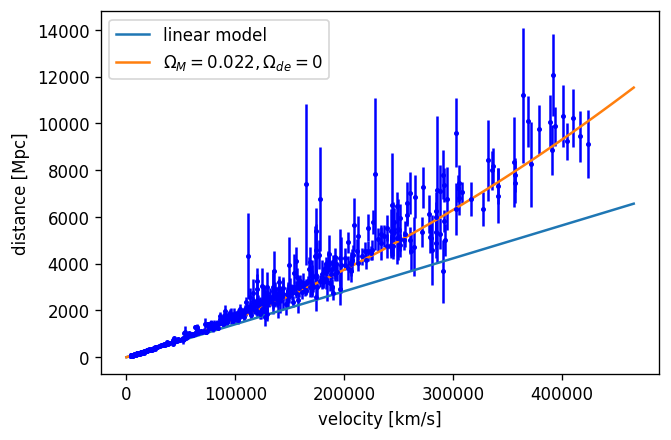

In [20]:
plotit(H0, 0.022, 0, z, r,sigma_r)

This is a much better fit to the data, but it still looks like the line falls below more than half of the data.

We can characterize how well the model fits the data by computing the "$\chi^2$" of the model with respect to the data, weighted by the uncertainty (errorbar) of each data point

$$\chi2 = \sum_{i=0}^{N-1} \left(\frac{\textrm{model}(z_i) - \textrm{data}_i}{\textrm{error}_i}\right)^2\,. $$

Let's write a function to do this:

In [21]:
def chi2(model, data,error):
    deviation = (model - data)/error
    c2 = np.sum(deviation**2)
    return c2

The $\chi^2$ of our linear model is then

In [22]:
c2 = chi2(t*v/Mpc, r,sigma_r)
print(f"chi2 = {c2:5.1f}")

chi2 = 3257.6


Let's modify our plotting function to report $\chi2$ for the model we choose

In [23]:
def plotit(H0, OmegaMatter, OmegaLambda, z, r,sigma_r):
    v = z * clight
    
    plt.errorbar(v,r,yerr=sigma_r,fmt='bo',markersize=2)
    plt.ylabel('distance [Mpc]')
    plt.xlabel('velocity [km/s]')
    
    zvec = np.linspace(0,1.1*max(z),100)   # vector of redshifts to compute the luminosity distance
    vvec = zvec * clight                   # corresponding vector of velocities in km/sec
    ld = LD(H0, OmegaMatter, OmegaLambda, zvec)  # luminosity distance in Mpc

    linear = t * vvec / Mpc                # Our simple linear model

    plt.plot(vvec, linear, label='linear model')
    plt.plot(vvec, ld, label=f'$\Omega_M={OmegaMatter:4.2f}$, $\Omega_\Lambda={OmegaLambda:4.2f}$')
    plt.legend()
    
    model = LD(H0, OmegaMatter, OmegaLambda, z)
    c2 = chi2(model, r,sigma_r)
    plt.text(0,8000,f'$\chi^2 = {c2:5.1f}$')


and try out the real GR model using the observed amount of regular matter in the Universe

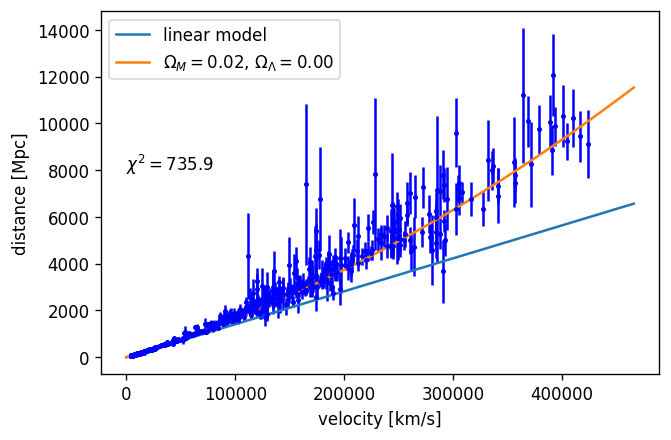

In [24]:
plotit(H0, 0.022, 0, z, r,sigma_r)

The $\chi^2$ for this model is clearly better than our linear model, but can we do better?

Astronomers know that most of the matter in the Universe is not in the form of ordinary matter (baryons -- matter made up of protons and neutrons). The rest of the matter is known as *Dark Matter* (not to be confused with Dark Energy!).

The amount of Dark Matter brings $\Omega_M$ up to about $0.29$, so let's try a cosmology with the full complement of matter

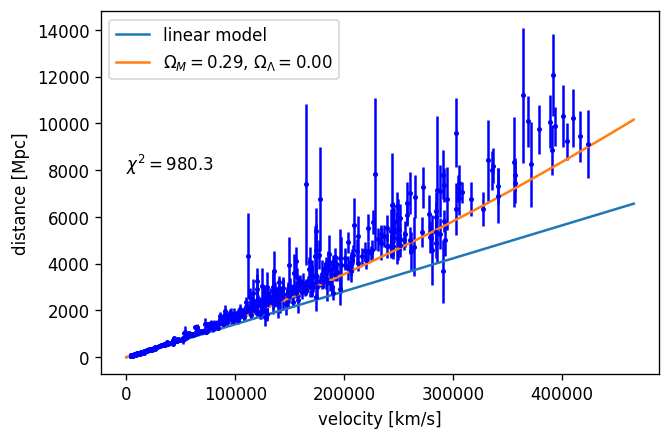

In [25]:
plotit(H0, 0.29, 0, z, r,sigma_r)

This model is worse! It falls even further below the points, and has an even higher standard deviation.

We could try putting in even more matter -- let's try putting in enough matter to make spacetime flat

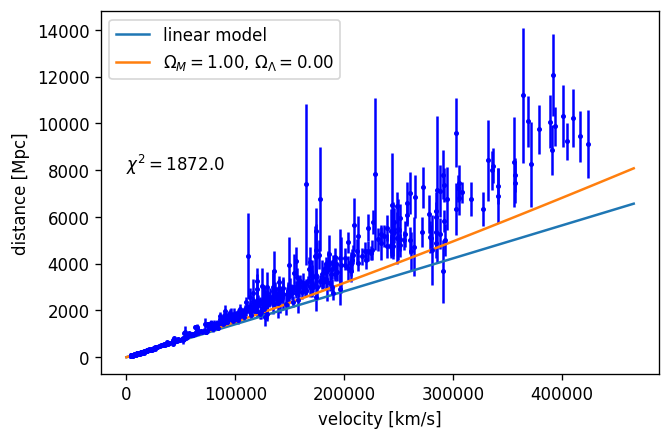

In [26]:
plotit(H0, 1, 0, z, r,sigma_r)

Even worse!

It seems that no amount of matter greater than what we observe in the Universe will fit the data with $\Omega_\Lambda=0$.

So, let's try putting in the observed amount of matter+dark matter, but add enough dark energy to make spacetime flat (there are good reasons to expect that spacetime is nearly flat on the largest scales). A flat cosmological model has
$\Omega_M + \Omega_\Lambda = 1$, so this makes $\Omega_\Lambda=0.71$

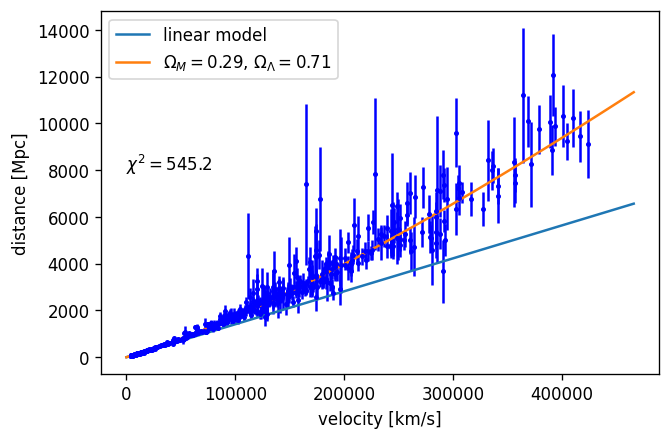

In [27]:
plotit(H0, 0.29, 0.71, z, r,sigma_r)

This model fits the data much better, and, in fact, is good evidence for the presence of dark energy in the universe. In fact, the Universe seems to be about 30% dark matter, 70% dark energy, and only about 2% "ordinary" matter, the kind we see on Earth.

So why are the distant supernovae moving more slowly than our simple model would predict? When we look at a distant galaxy, the light from that galaxy has taken some time to travel to us. Thus, we see it not as it is now but as it was when the light left the galaxy.

![title](cosmology.png)

This figure shows the scale of the Universe as a function of time before and after today. There are five cosmological models:

  > Orange line: lots of matter and no dark energy -- the expansion rate is continuously decreasing, and the Universe will end up collapsing
  Green line: a flat universe with only matter -- this is the dividing line between expanding forever and eventually collapsing  
  dashed line: our linear model -- also the GR model for an empty Universe, one with no matter or dark energy.  
  Red line: our "best fit" model -- the expansion rate started off decelerating, but then started accelerating about
  6.4 billion years ago  
  Blue line: more dark energy -- the expansion rate started accelerating about 11.6 billion years ago  

The expansion rate of the Universe in the red region of the diagram has always slowed down with time. In this region, we expect that the distant supernovae, the lower blue dots, would have larger velocities than our linear model would predict
since the expansion rate was higher on average in the earlier Universe.

The expansion rate in the green region starts out decelerating (the curves are concave down), but then start accelerating some time in the past. In this region, we expect that the distant supernovae would have smaller velocities than our linear model would predict since the expansion rate was lower on average in the earlier Universe.


#### Exercise 1.

In the discussion above, I pulled values of $\Omega_M$ and $\Omega_\Lambda$ out of this air! Let's play with some ideas of how we could choose models more automatically.

In this exercise we will assume that the Universe is flat -- that $\Omega_\Lambda = 1 - \Omega_M$. Assuming a value for $H_0$, there is then only one parameter to our model, $\Omega_M$. You are going to write a program which sweeps through values of $\Omega_M$ from $0$ to $1$ and calculates the probability $P$ of the model given our dataset for each value. You will then plot the resulting graph of $P$ versus $\Omega_M$.

In more detail:

  * This time, we will fit the data in their original distance modulus form instead of converting them to physical distance. The arrays containing the data we have already loaded are `z`, `dm`, and `dme`.

    You will have to convert the luminosity distance `LD` function above into a distance modulus `DM` function which returns the model distance modulus given the reshift array `z` and a set of cosmological parameters $H_0$, $\Omega_M$, and $\Omega_\Lambda$. Using the functions from `scipy.cosmology`, this would be

         cosmo = LambdaCDM(H0=H0, Om0=OmegaMatter, Ode0=OmegaLambda)
         model_distance_modulus = 5 * np.log10( cosmo.luminosity_distance(z).value * 1e5 )
     
    where the factor of $10^5$ comes in beacuse `scipy` gives us Mpc and the distance modulus is defined at 10 parsecs.

  * The probability $P$ that a $\chi^2$ as large as the measured value could have happened by accident is given by

      $$ P = Q\left(\frac{N-2}{2}, \frac{\chi^2}{2}\right) $$

    where $Q$ is the *incomplete gamma function*, available in the `scipy.special` module as `gammaincc`, so

        from scipy.special import gammaincc as Q

   * You will need to create an array of $\Omega_M$ running between 0 and 1 and with 100 elements. `numpy` has a great function for this: `linspace(start, end, npts)` This is like `arange`, but for where you want to specify the number of points, not the spacing between points -- also worth noting is that, in `linspace`, the "end" point is included in the array. So, you would write something like

         Om = np.linspace(0,1,100)

Try to sketch out the outline of the solution before worrying about the details of each step, and then start filling in the details. You are free to use any of the functions defined above if they make things easier.

As we have seen from the experiments above, the graph should tell you that the best fit value of $\Omega_M$ is close to 0.3.

#### Exercise 2.

Now let's relax the restriction to a flat Universe. 

   * Create one array for values of $\Omega_M$ with 30 points running from 0 to 1, and another array for values of $\Omega_\Lambda$ with 30 points running from 0 to 1:
   
         ngrid = 30
         Om = np.linspace(0,1,ngrid)
         Ol = np.linspace(0,1,ngrid)

   * Next, create a two-dimensional `numpy` array with dimensions of $\textrm{ngrid}\times\textrm{ngrid}$. The `numpy` syntax to create an array of zeros like this is

         chi2array = np.zeros( (ngrid,ngrid) )
         
     and the syntax to access the i,j-th element is

         chi2array[i,j] = Q( (npts-2)/2, chi2/2 )
         
   * You fill in the array using a double for-loop:
   
         for i in range(ngrid):
             for j in range(ngrid):
                 chi2array[i,j] = some function of Om[i] and Ol[j]
         
   * Once you have computed these arrays, you can make a contour plot of the probability of any $\Omega_M,\Omega_\Lambda$ pair. The recipe for doing this in `matplotlib` is
   
         X,Y = np.meshgrid(Om, Ol)
         c = plt.contour( Y, X, chi2array, levels=[0.003, 0.05, 0.32] )
         plt.clabel( c, inline=1 )
         

When you are done, your plot should look like a simpler version of the one from the paper mentioned above, with only the blue region for the supernovae. Note: don't try to extend the range of your own plot into the grey area -- scipy can't handle it!


![title](scp2.1.png)